In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, multivariate_normal

In [2]:
# Parameters for the normal distribution representing the heights of fathers
mu_height = 68.3  # mean height in inches
sigma_height = 1.8  # standard deviation in inches

# Generate x values (heights)
x_heights = np.linspace(mu_height - 4*sigma_height, mu_height + 4*sigma_height, 1000)

# Calculate the PDF for the normal distribution
pdf_height = (1 / (sigma_height * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_heights - mu_height) / sigma_height) ** 2)

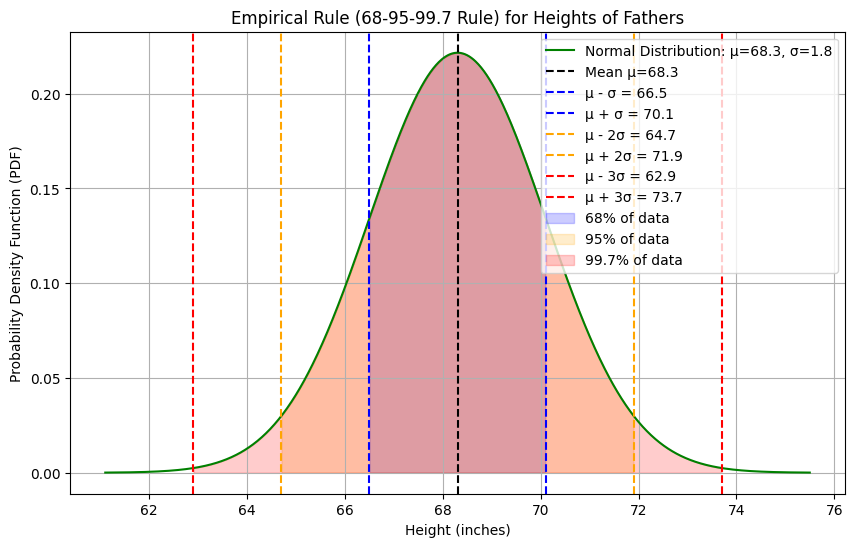

In [3]:
# Generate x values (heights)
x_heights = np.linspace(mu_height - 4*sigma_height, mu_height + 4*sigma_height, 1000)

# Calculate the PDF for the normal distribution
pdf_height = (1 / (sigma_height * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_heights - mu_height) / sigma_height) ** 2)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x_heights, pdf_height, label=f'Normal Distribution: μ={mu_height}, σ={sigma_height}', color='green')

# Empirical rule intervals
plt.axvline(mu_height, color='black', linestyle='--', label=f'Mean μ={mu_height}')

# 68% interval (1 sigma)
plt.axvline(mu_height - sigma_height, color='blue', linestyle='--', label=f'μ - σ = {mu_height - sigma_height:.1f}')
plt.axvline(mu_height + sigma_height, color='blue', linestyle='--', label=f'μ + σ = {mu_height + sigma_height:.1f}')

# 95% interval (2 sigma)
plt.axvline(mu_height - 2*sigma_height, color='orange', linestyle='--', label=f'μ - 2σ = {mu_height - 2*sigma_height:.1f}')
plt.axvline(mu_height + 2*sigma_height, color='orange', linestyle='--', label=f'μ + 2σ = {mu_height + 2*sigma_height:.1f}')

# 99.7% interval (3 sigma)
plt.axvline(mu_height - 3*sigma_height, color='red', linestyle='--', label=f'μ - 3σ = {mu_height - 3*sigma_height:.1f}')
plt.axvline(mu_height + 3*sigma_height, color='red', linestyle='--', label=f'μ + 3σ = {mu_height + 3*sigma_height:.1f}')

# Highlight the empirical rule percentages on the plot
plt.fill_between(x_heights, 0, pdf_height, where=((x_heights >= mu_height - sigma_height) & (x_heights <= mu_height + sigma_height)), color='blue', alpha=0.2, label='68% of data')
plt.fill_between(x_heights, 0, pdf_height, where=((x_heights >= mu_height - 2*sigma_height) & (x_heights <= mu_height + 2*sigma_height)), color='orange', alpha=0.2, label='95% of data')
plt.fill_between(x_heights, 0, pdf_height, where=((x_heights >= mu_height - 3*sigma_height) & (x_heights <= mu_height + 3*sigma_height)), color='red', alpha=0.2, label='99.7% of data')

plt.title('Empirical Rule (68-95-99.7 Rule) for Heights of Fathers')
plt.xlabel('Height (inches)')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [4]:
# Function to plot PMF for a single discrete variable
def plot_single_variable_pmf(outcomes, probabilities, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.bar(outcomes, probabilities)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(outcomes)
    plt.grid(axis='y')
    plt.show()

# Function to plot joint PMF for two discrete variables
def plot_joint_variable_pmf(outcomes, joint_probabilities, title, xlabel, ylabel, zlabel):
    X, Y = np.meshgrid(outcomes, outcomes)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.bar3d(X.flatten(), Y.flatten(), np.zeros_like(X.flatten()), 1, 1, joint_probabilities.flatten())
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.xticks(outcomes)
    plt.yticks(outcomes)
    plt.show()


In [5]:
# Data generation for the single variable PMF (e.g., rolling a six-sided die)
outcomes_die = np.arange(1, 7)  # Possible outcomes: 1, 2, 3, 4, 5, 6
probabilities_die = np.full(6, 1/6)  # Equal probability for each outcome

# Data generation for the joint variable PMF (e.g., two six-sided dice)
joint_probabilities_dice = np.full((6, 6), 1/36)  # Equal probability for each pair of outcomes

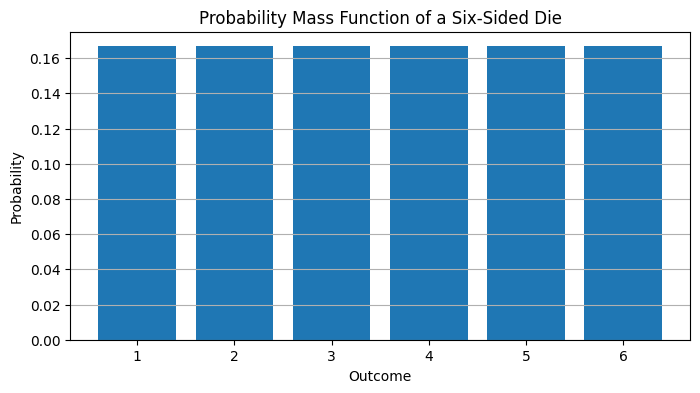

In [6]:
# Plotting the single variable PMF
plot_single_variable_pmf(outcomes_die, probabilities_die, 
                         title='Probability Mass Function of a Six-Sided Die', 
                         xlabel='Outcome', ylabel='Probability')

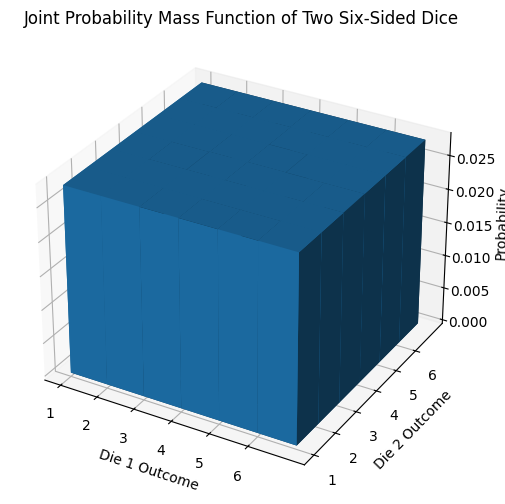

In [7]:
# Plotting the joint variable PMF for two dice
plot_joint_variable_pmf(outcomes_die, joint_probabilities_dice, 
                        title='Joint Probability Mass Function of Two Six-Sided Dice', 
                        xlabel='Die 1 Outcome', ylabel='Die 2 Outcome', zlabel='Probability')

In [8]:
# Function to plot the PDF of a single variable
def plot_single_variable_pdf(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Function to plot the joint PDF of two variables
def plot_joint_variable_pdf(x, y, z, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    plt.contourf(x, y, z)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar()
    plt.grid(True)
    plt.show()

In [9]:
# Data generation for single variable PDF (e.g., normal distribution)
x_single = np.linspace(-5, 5, 100)
y_single = norm.pdf(x_single, 0, 1)  # Normal distribution with mean=0 and std=1

# Data generation for joint variable PDF (e.g., bivariate normal distribution)
x_joint, y_joint = np.mgrid[-5:5:.1, -5:5:.1]
pos_joint = np.dstack((x_joint, y_joint))
rv_joint = multivariate_normal([0, 0], [[1, 0], [0, 1]])  # Mean=[0,0], Covariance=[[1, 0], [0, 1]]
z_joint = rv_joint.pdf(pos_joint)

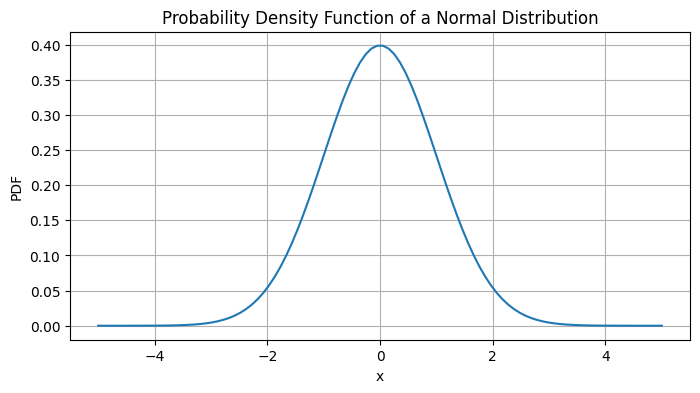

In [10]:
# Plotting the single variable PDF
plot_single_variable_pdf(x_single, y_single, 
                         title='Probability Density Function of a Normal Distribution', 
                         xlabel='x', ylabel='PDF')

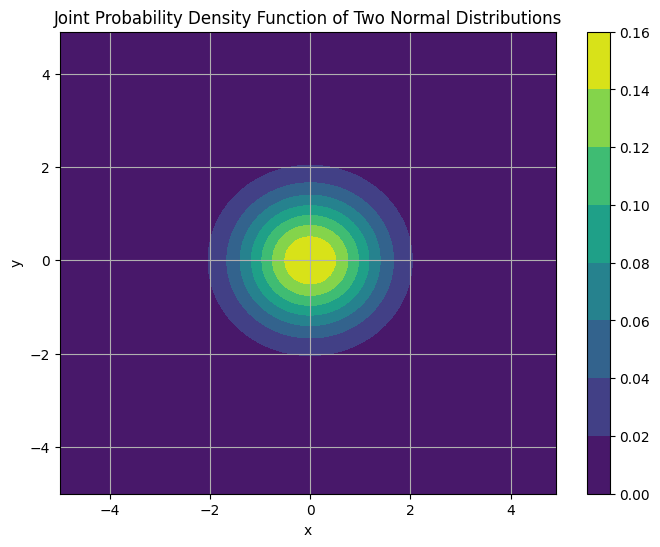

In [11]:
# Plotting the joint variable PDF
plot_joint_variable_pdf(x_joint, y_joint, z_joint, 
                        title='Joint Probability Density Function of Two Normal Distributions', 
                        xlabel='x', ylabel='y')

In [12]:
# Function to plot CDF for a single continuous variable
def plot_single_variable_cdf(x, cdf, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.plot(x, cdf)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Function to plot CDF for a discrete variable
def plot_discrete_variable_cdf(outcomes, probabilities, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.step(outcomes, probabilities, where='post')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(outcomes - 0.5)
    plt.yticks(np.linspace(0, 1, len(outcomes)))
    plt.grid(True)
    plt.show()

In [13]:
# Data generation for a continuous variable CDF (e.g., normal distribution)
x_continuous = np.linspace(-5, 5, 1000)
cdf_continuous = norm.cdf(x_continuous, 0, 1)  # Normal distribution with mean=0 and std=1

# Data generation for a discrete variable CDF (e.g., rolling a six-sided die)
outcomes_discrete = np.arange(1, 8)  # Outcomes: 1 to 6
probabilities_discrete = np.cumsum(np.full(6, 1/6))  # Cumulative sum of probabilities
probabilities_discrete = np.append([0], probabilities_discrete)  # To include CDF starting from 0

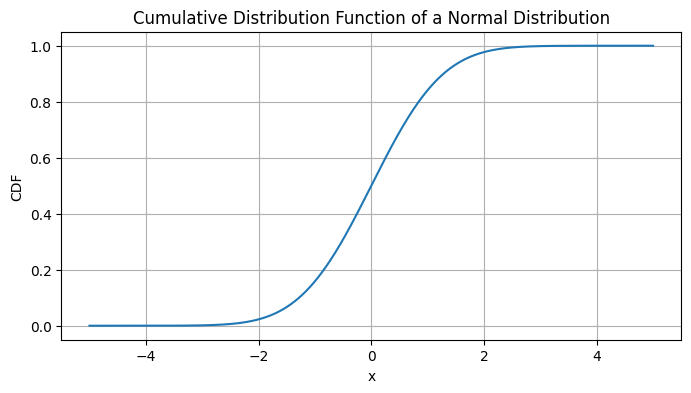

In [14]:
# Plotting the CDF for a single continuous variable
plot_single_variable_cdf(x_continuous, cdf_continuous, 
                         title='Cumulative Distribution Function of a Normal Distribution', 
                         xlabel='x', ylabel='CDF')

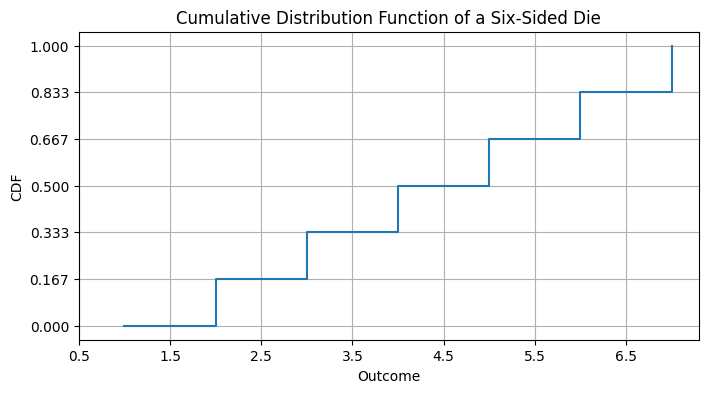

In [15]:
# Plotting the CDF for a discrete variable
plot_discrete_variable_cdf(outcomes_discrete, probabilities_discrete, 
                           title='Cumulative Distribution Function of a Six-Sided Die', 
                           xlabel='Outcome', ylabel='CDF')